# Trabalhando com Regressão Linear Simples e Múltipla

Nesse notebook serão feitas as previsões de determinadas variáveis utilizando regressão linear.

## Importações

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
from sklearn.linear_model import LinearRegression

In [49]:
from yellowbrick.regressor import ResidualsPlot

In [71]:
from sklearn.model_selection import train_test_split

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Base de Dados - Plano de Saúde

Regressão Linear Simples

In [4]:
plano_saude = pd.read_csv('../data/plano_saude.csv')

In [5]:
plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


## Separação das Variáveis e Correlação

In [6]:
X_plano_saude = plano_saude.iloc[:, 0].values #numpy array
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [7]:
y_plano_saude = plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [8]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

93% do custo do plano de saúde pode ser explicado pela idade da pessoa. Correlação forte entre as duas variáveis.

## Dimensionalidade

In [9]:
X_plano_saude.shape

(10,)

Pode-se observar que a variável está em uma única dimensão, deve-se colocá-la em duas dimensões para enviar ao algoritmo de Regressão.

In [12]:
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

## Prevendo com Regressão Linear Simples

Criação do Modelo:

In [14]:
regressor_plano_saude = LinearRegression()

# Treinamento - encontrar o parãmetro b0 e os coeficientes para cada um dos atributos
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [15]:
#b0
regressor_plano_saude.intercept_

np.float64(-558.9490909090912)

In [16]:
#b1
regressor_plano_saude.coef_

array([61.86787879])

In [17]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

 - y = b0 + b1 * x1

In [46]:
# Usando a fórmula para calcular
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

Ou seja, quando utilizamos o predict, o algoritmo está fazendo uso da fórmula.

In [47]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

## Gráfico

Pode gerar um erro em relação ao dimensionamento do X, uma vez que foi necessário colocá-lo em formato de matriz para treinar e prever. Para o gráfico será necessário voltar para o formato de vetor.

In [18]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

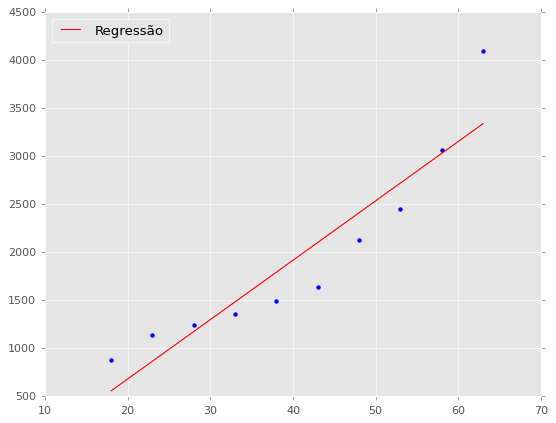

In [44]:
grafico = sns.scatterplot(x=X_plano_saude.ravel(), y=y_plano_saude)
# Inserindo o gráfico de previsões
plt.plot(X_plano_saude, previsoes, color='red', label='Regressão')
plt.ylim(500, None)
plt.legend(loc='upper left')
plt.show()

Visualização dos Residuais (o quanto os dados estão afastados da linha de regressão)

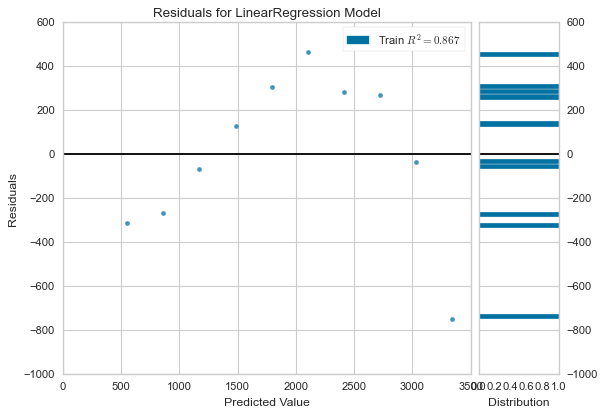

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

## Avaliação do Algoritmo de Regressão

In [48]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

# Base de Dados - Preço das Casas

In [52]:
base_casas = pd.read_csv('../data/house_prices.csv')

In [53]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Análise Exploratória

In [60]:
base_casas.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [54]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Correlações

In [58]:
base_casas_numerico = base_casas.select_dtypes(include=['float64', 'int64'])
correlacao = base_casas_numerico.corr()

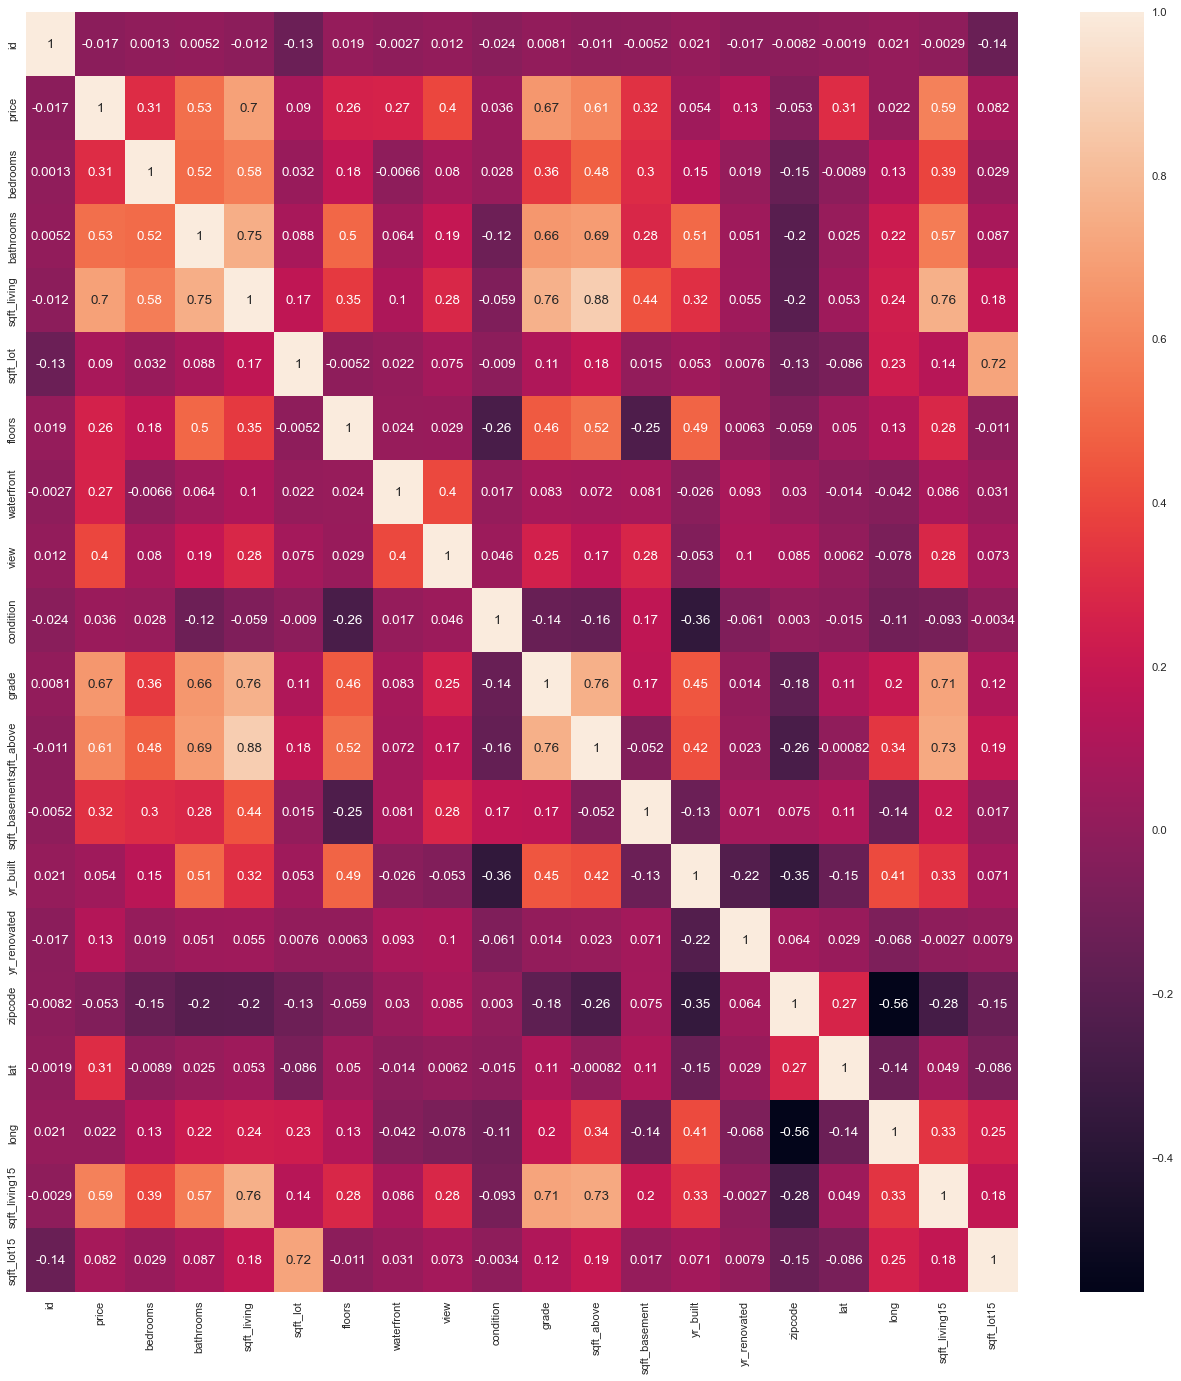

In [66]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas_numerico.corr(), annot=True);

## Separação das variáveis

In [68]:
X_casas = base_casas.iloc[:, 5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [70]:
y_casas = base_casas.iloc[:,2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

Separando os dados de treinamento e teste. 30% teste, 70% treino

In [72]:
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [73]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [74]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

## Previsão

Criação do Modelo

In [75]:
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [76]:
#b0
regressor_simples_casas.intercept_

np.float64(-37893.59850106703)

In [77]:
#b1
regressor_simples_casas.coef_

array([278.32860644])

In [78]:
# Score - Avaliação
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [79]:
# Score - Avaliação
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453016

Os valores indicam que o algoritmo teve um desepenho ruim.

Inicialmente será feito a previsão dos dados de treinamento

In [80]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

## Gráficos Treinamento

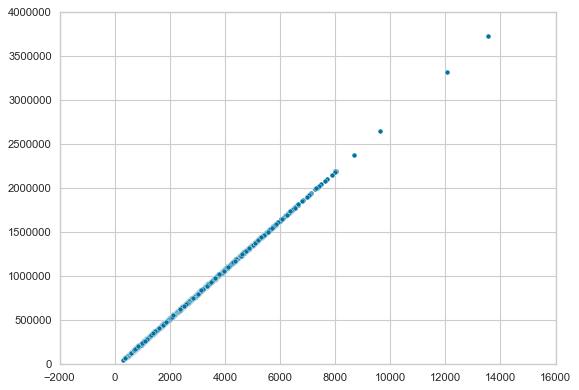

In [83]:
# Geração do gráfico da previsão inicial com os dados de treinamento

grafico = sns.scatterplot(x=X_casas_treinamento.ravel(), y=previsoes)
plt.ylim(0,None)
plt.show()

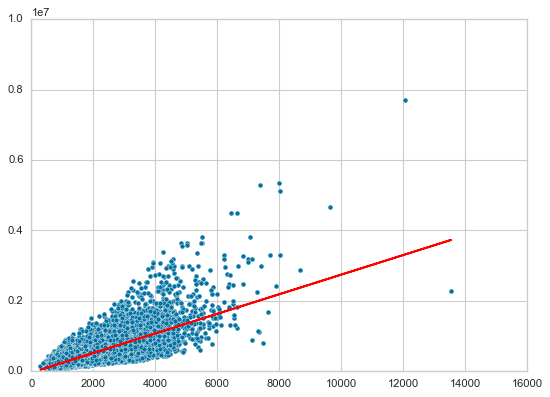

In [86]:
grafico1 = sns.scatterplot(x=X_casas_treinamento.ravel(), y=y_casas_treinamento)
plt.plot(X_casas_treinamento.ravel(), previsoes, color='red')
plt.ylim(0,None)
plt.xlim(0,None)
plt.show()


## Métricas de Avaliação

### Previsão (Teste)

In [89]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [88]:
# Preço real
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

### Diferença entre os valores

In [91]:
# Extração do valor absoluto - Mean Absolute Error
abs(y_casas_teste - previsoes_teste).mean()

np.float64(172604.12889995414)

Interpretação: Ao fazer a previsão com esse algoritmo, ele pode errar 172.604,12 para cima ou para baixo.

In [93]:
mean_absolute_error(y_casas_teste, previsoes_teste)

172604.12889995414

In [94]:
mean_squared_error(y_casas_teste, previsoes_teste)

70170013932.11592

In [95]:
# root mean square error
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

np.float64(264896.23238565685)

## Gráfico Teste

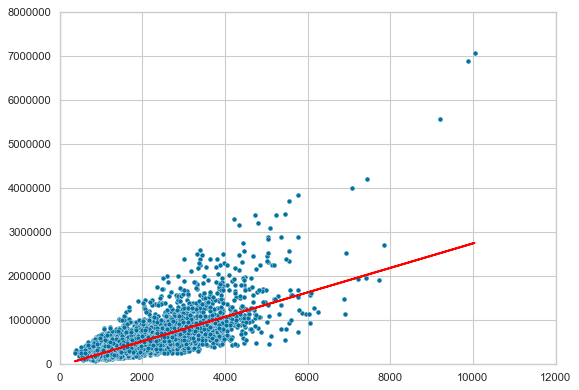

In [96]:
grafico1 = sns.scatterplot(x=X_casas_teste.ravel(), y=y_casas_teste)
plt.plot(X_casas_teste.ravel(), previsoes_teste, color='red')
plt.ylim(0,None)
plt.xlim(0,None)
plt.show()

Mesmo comportamento para a base de dados de treinamento.

# Regressão Linear Múltipla 

In [97]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Separação das Variáveis

In [98]:
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [100]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [101]:
# Divisão dos dados em treino e teste
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [103]:
X_casas_treinamento.shape, X_casas_teste.shape

((15129, 16), (6484, 16))

## Previsão

### Criação do Modelo

In [104]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [105]:
#b0
regressor_multiplo_casas.intercept_

np.float64(5736222.703412161)

In [106]:
#b1
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179158e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226267e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

- y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn

Nesse caso, será uma lista com cada atributo selecionado anteriormente.

### Avaliação do Score

In [107]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.7029888085955007

Na regressão simples, o resultado foi de 49%. Na regressão múltipla foi de 70%

In [108]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6885414149062644

### Previsões

In [109]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467043])

In [110]:
# valor real
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [111]:
mean_absolute_error(y_casas_teste, previsoes) # valor real - valor previsao

123888.44377485868

Indica que ao fazer a previsão usando esse algoritmo você pode errar 123.888,44 para cima ou para baixo. Um valor alto, porém bem menor comparado a regressão simples.

In [112]:
mean_squared_error(y_casas_teste, previsoes)

42760757001.53654